In [1]:
from keras.models import load_model
from generator import captcha_generator as gen
import string
from tqdm import tqdm
import numpy as np
from matplotlib import pyplot as plt
import cv2

Using TensorFlow backend.


In [16]:
chars = string.ascii_lowercase + string.ascii_uppercase
width, height, n_len, n_class = 130, 53, 4, len(chars)

In [11]:
model = load_model('weixin_trained_model.h5')

/home/z/anaconda2/lib/python2.7/site-packages/keras/models.py:258: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '


In [15]:
def decode(y):
    y = np.argmax(np.array(y), axis=2)[:,0]
    return ''.join([chars[x] for x in y])

In [5]:
def evaluate(model, batch_num=20):
    batch_acc = 0
    generator = gen(width=width, height=height)
    for i in tqdm(range(batch_num)):
        X, y = generator.next()
        y_pred = model.predict(X)
        batch_acc += np.mean(map(np.array_equal, np.argmax(y, axis=2).T, np.argmax(y_pred, axis=2).T))
    return batch_acc / batch_num

In [6]:
print evaluate(model)

100%|██████████| 20/20 [00:28<00:00,  1.33s/it]

0.0796875


In [7]:
generator = gen(width=width, height=height, batch_size=1)

In [8]:
X, y = generator.next()

In [9]:
X.shape
decode(y)

'yFwM'

In [10]:
def yevaluate(model, cnt=1000):
    batch_acc = 0
    generator = gen(width=width, height=height, batch_size=1)
    for _ in tqdm(range(cnt)):
        X, y = generator.next()
        y_pred = model.predict(X)
        if decode(y).lower() == decode(y_pred).lower():
            batch_acc += 1
    return float(batch_acc) / cnt

In [11]:
print yevaluate(model, 10000)

100%|██████████| 10000/10000 [04:16<00:00, 39.02it/s]

0.9398


# 生成函数测试

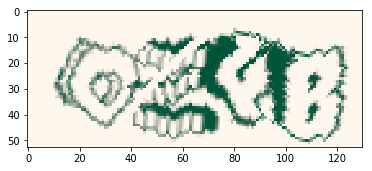

y: OzYB
pred_y: OZYB


In [12]:
a = gen(width=width, height=height, batch_size=1)
X, y = a.next()
pred_y = model.predict(X)
plt.imshow(cv2.cvtColor(X[0], cv2.COLOR_BGR2RGB))
plt.show()
print 'y:', decode(y)
print 'pred_y:', decode(pred_y)

In [13]:
X[:, 12:18, 3:10]

array([[[[237, 247, 254],
         [237, 247, 254],
         [237, 247, 254],
         [237, 247, 254],
         [237, 247, 254],
         [237, 247, 254],
         [237, 247, 254]],

        [[237, 247, 254],
         [237, 247, 254],
         [237, 247, 254],
         [237, 247, 254],
         [237, 247, 254],
         [237, 247, 254],
         [237, 247, 254]],

        [[237, 247, 254],
         [237, 247, 254],
         [237, 247, 254],
         [237, 247, 254],
         [237, 247, 254],
         [237, 247, 254],
         [237, 247, 254]],

        [[237, 247, 254],
         [237, 247, 254],
         [237, 247, 254],
         [237, 247, 254],
         [237, 247, 254],
         [237, 247, 254],
         [237, 247, 254]],

        [[237, 247, 254],
         [237, 247, 254],
         [237, 247, 254],
         [237, 247, 254],
         [237, 247, 254],
         [237, 247, 254],
         [237, 247, 254]],

        [[237, 247, 254],
         [237, 247, 254],
         [237, 247, 254],
  

# 实测

In [14]:
test_path = os.getcwd() + '/sample'
root, dirs, files = os.walk(test_path).next()

def getAllImages(path):
    cnt = len(files)
    X = np.zeros((cnt, height, width, 3), dtype=np.uint8)
    y = []
    for i, j in enumerate(files):
        X[i] = cv2.imread(root+'/'+j)
        #img = cv2.imread(root+'/'+j)
        #b, g, r = cv2.split(img)
        #X[i] = cv2.merge([r, g, b])
        y.append(j[:4])
    return X, y

allX, ally = getAllImages(test_path)

In [15]:
pred_y = model.predict(allX[2].reshape(X.shape))

In [16]:
decode(pred_y)

'NwHy'

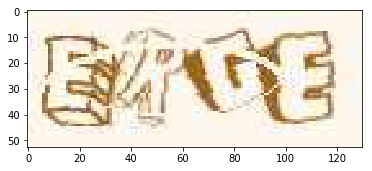

In [17]:
plt.imshow(cv2.cvtColor(allX[6], cv2.COLOR_BGR2RGB))
plt.show()

In [18]:
allX[6][32:48, 6:8]

array([[[ 83, 120, 142],
        [ 94, 132, 156]],

       [[ 77, 114, 136],
        [ 81, 119, 143]],

       [[ 74, 110, 134],
        [ 76, 113, 139]],

       [[ 79, 115, 139],
        [ 92, 129, 157]],

       [[ 91, 125, 149],
        [115, 152, 180]],

       [[ 95, 129, 153],
        [120, 157, 185]],

       [[ 93, 124, 149],
        [104, 138, 167]],

       [[ 90, 118, 142],
        [ 84, 117, 143]],

       [[194, 221, 242],
        [158, 188, 213]],

       [[220, 244, 255],
        [197, 224, 245]],

       [[232, 252, 255],
        [227, 249, 255]],

       [[230, 246, 255],
        [231, 247, 255]],

       [[226, 238, 248],
        [229, 243, 255]],

       [[235, 244, 253],
        [240, 249, 255]],

       [[239, 247, 254],
        [248, 254, 255]],

       [[234, 243, 247],
        [243, 250, 253]]], dtype=uint8)

In [19]:
al = ally[0]
al.lower()

'febe'

In [20]:
count = len(ally)
correct = 0
for i, j in zip(allX, ally):
    predy = model.predict(i.reshape(X.shape))
    predy = decode(predy)
    if predy.lower() == j.lower():
        correct += 1
print 'the total correct number is %d' %correct
print 'the right rate is %.2f%%' %(float(correct)/count*100)

the total correct number is 270
the right rate is 27.66%


In [22]:
b, g, r = cv2.split(allX[6])

In [23]:
rgb_img = cv2.merge([r, g, b])

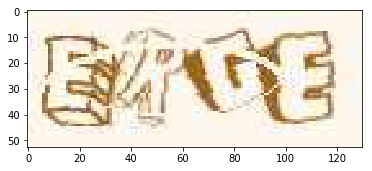

In [24]:
plt.imshow(rgb_img)
plt.show()

In [3]:
import os

In [4]:
test_path = os.getcwd() + '/sample'

In [5]:
test_path

'/home/z/gtest/weixin_captcha_break/sample'

In [8]:
x = cv2.imread(test_path+'/ABDm.png')

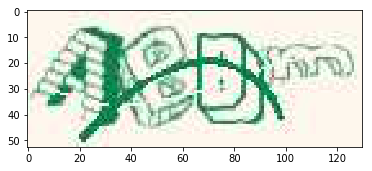

In [9]:
plt.imshow(cv2.cvtColor(x, cv2.COLOR_BGR2RGB))
plt.show()

In [13]:
pred_y = model.predict(x.reshape((1,)+x.shape))

In [14]:
pred_y

[array([[  4.70779002e-01,   3.91138456e-05,   3.10555879e-05,
           1.34609290e-04,   9.32999592e-06,   1.42559566e-06,
           3.88239678e-05,   6.09125455e-05,   3.20499748e-06,
           3.92196845e-04,   1.49978378e-05,   2.73031424e-06,
           1.42792793e-04,   5.50742901e-04,   2.95709615e-04,
           1.91154504e-05,   1.44023737e-02,   7.91201601e-04,
           1.02516446e-04,   8.98941362e-05,   4.22108787e-05,
           6.78503420e-05,   4.76224050e-05,   2.88787356e-04,
           2.51410947e-05,   4.96466673e-05,   4.85136807e-01,
           6.88018044e-05,   3.79929224e-05,   4.65464400e-05,
           2.13032163e-05,   1.04875210e-06,   5.81882123e-05,
           2.88792453e-05,   4.24158088e-06,   3.10701202e-04,
           1.88958657e-05,   2.69892985e-06,   1.04501822e-04,
           1.02484238e-03,   2.11894177e-04,   3.12949560e-05,
           2.21745390e-02,   1.73295068e-03,   1.18090487e-04,
           3.98759403e-05,   3.12732336e-05,   3.385059

In [17]:
decode(pred_y)

'AbBm'

In [18]:
!ls sample

AACG.png  DBPC.png	ERPD.png      HXMH.png	    OBOR.png	  SDGH.png
ABDm.png  DBPE.png	ETOG.png      HXMm.png	    OCGO.png	  SDLE.png
ABGq.png  DBTM.png	ETRE.png      HXnm.png	    OCOF.png	  SFAL.png
ABHC.png  DCBR.png	EZAH.png      HXNX.png	    OCPB.png	  SFLq.png
ACKR.png  DCEC.png	FAGD.png      HXQY.png	    OCPE.png	  SFSL.png
ACLO.png  DCGD.png	FAHL.png      HXwY.png	    ODDC.png	  SGmB.png
AEDS.png  DCOE.png	FBAF.png      HXyh.png	    ODEB.png	  SHMK.png
AGDF.png  DCPC.png	FBBD.png      HXYm.png	    ODGR.png	  SHOE.png
AGFM.png  DCPD.png	FBCD.png      HXYY.png	    OEDE.png	  SLBD.png
AGTn.png  DCPG.png	FBGB.png      HyHM.png	    OEFC.png	  SQHW.png
AKQP.png  DCPR.png	FBGF.png      HyHN.png	    OEFD.png	  STAT.png
AKTH.png  DCRC.png	FBPB.png      HYHY.png	    OEFE.png	  TAOE.png
AKWm.png  DDBB.png	FBPF.png      HymH.png	    OEQP.png	  TASE.png
ALGH.png  DDDE.png	FCDF.png      HYMm.png	    OFGR.png	  TBQA.png
ALKW.png  DDGB.png	FCDL.png      HYMY.png	    OFmL.png	  TCQZ.png
ALRD.png  